In [2]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import datetime


In [3]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [4]:
data = pd.read_csv(r"C:\Users\Bhargava\Downloads\Ration.csv")

In [5]:
sns.set_context('notebook') 
sns.set_style('ticks')
red='#D62728'
blue='#1F77B4'
%matplotlib inline

In [6]:
data.head()

,Sl No.,Mandal,Nov-2017,Dec_2017,Jan_2018,Feb_2018,Mar_2018,Apr_2018,May_2018,June_2018,July_2018,Aug_2018,Sep_2018,Oct_2018,Nov_2018,Dec_2018,Jan_2019,Feb_2019
0,1,Koilkuntla,86.43,87.76,90.70,90.14,91.09,91.59,90.37,91.23,91.74,91.17,91.07,90.56,91.39,91.93,93.07,93.06
1,2,Maddikera East,85.92,86.47,90.01,88.19,87.97,88.95,88.68,88.23,88.60,89.05,87.97,90.28,89.58,89.63,91.18,91.29
2,3,Allagadda,84.05,84.47,87.92,86.79,87.02,87.10,85.42,87.42,87.18,88.67,87.56,88.08,88.91,89.93,91.05,89.99
3,4,Kolimingundla,87.11,87.96,89.90,89.60,88.31,89.36,88.08,89.00,89.34,89.35,88.87,89.24,88.75,89.27,90.88,89.89
4,5,Kallur,84.50,84.82,87.07,87.81,87.09,87.25,86.75,87.72,87.51,88.03,86.47,88.61,88.69,88.62,90.10,88.72


In [7]:
a1 = datetime.date(2017,11,1)
a2 = datetime.date(2017,12,1)
a3 = datetime.date(2018,1,1)
a4 = datetime.date(2018,2,1)
a5 = datetime.date(2018,3,1)
a6 = datetime.date(2018,4,1)
a7 = datetime.date(2018,5,1)
a8 = datetime.date(2018,6,1)
a9 = datetime.date(2018,7,1)
a10 = datetime.date(2018,8,1)
a11 = datetime.date(2018,9,1)
a12 = datetime.date(2018,10,1)
a13 = datetime.date(2018,11,1)
a14 = datetime.date(2018,12,1)
a15 = datetime.date(2019,1,1)
a16 = datetime.date(2019,2,1)


In [61]:
#data = data.drop(['Sl No.'],axis=1)
data.columns = ['Sl No.','Mandal',a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,a11,a12,a13,a14,a15,a16]
#data = data.drop(['Sl No.','Mandal',a1,a2,a15,a16],axis=1)

In [62]:
data.head()

,2018-01-01,2018-02-01,2018-03-01,2018-04-01,2018-05-01,2018-06-01,2018-07-01,2018-08-01,2018-09-01,2018-10-01,2018-11-01,2018-12-01
0,90.70,90.14,91.09,91.59,90.37,91.23,91.74,91.17,91.07,90.56,91.39,91.93
1,90.01,88.19,87.97,88.95,88.68,88.23,88.60,89.05,87.97,90.28,89.58,89.63
2,87.92,86.79,87.02,87.10,85.42,87.42,87.18,88.67,87.56,88.08,88.91,89.93
3,89.90,89.60,88.31,89.36,88.08,89.00,89.34,89.35,88.87,89.24,88.75,89.27
4,87.07,87.81,87.09,87.25,86.75,87.72,87.51,88.03,86.47,88.61,88.69,88.62


In [63]:
data1 = data.transpose()
data1.head()

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
2018-01-01,90.70,90.01,87.92,89.90,87.07,87.02,88.21,88.54,87.20,88.42,...,81.97,78.88,83.43,84.05,85.180,74.52,85.42,82.57,81.77,79.04
2018-02-01,90.14,88.19,86.79,89.60,87.81,88.31,87.46,87.57,87.19,87.44,...,81.77,81.82,82.79,81.26,82.040,71.19,81.15,80.02,79.67,78.25
2018-03-01,91.09,87.97,87.02,88.31,87.09,88.40,87.01,84.77,86.56,87.05,...,81.78,81.20,81.55,81.32,81.148,75.22,80.51,79.67,79.33,78.36
2018-04-01,91.59,88.95,87.10,89.36,87.25,88.42,87.45,84.74,86.11,87.33,...,82.55,82.43,82.79,81.70,81.980,75.56,81.10,79.56,80.92,78.77
2018-05-01,90.37,88.68,85.42,88.08,86.75,87.59,86.43,84.76,85.53,86.67,...,81.83,83.46,83.07,80.41,81.190,71.98,82.31,77.25,80.17,77.08


In [64]:
y1 = data1[1].copy()
y1.head()

2018-01-01    90.01
2018-02-01    88.19
2018-03-01    87.97
2018-04-01    88.95
2018-05-01    88.68
Name: 1, dtype: float64

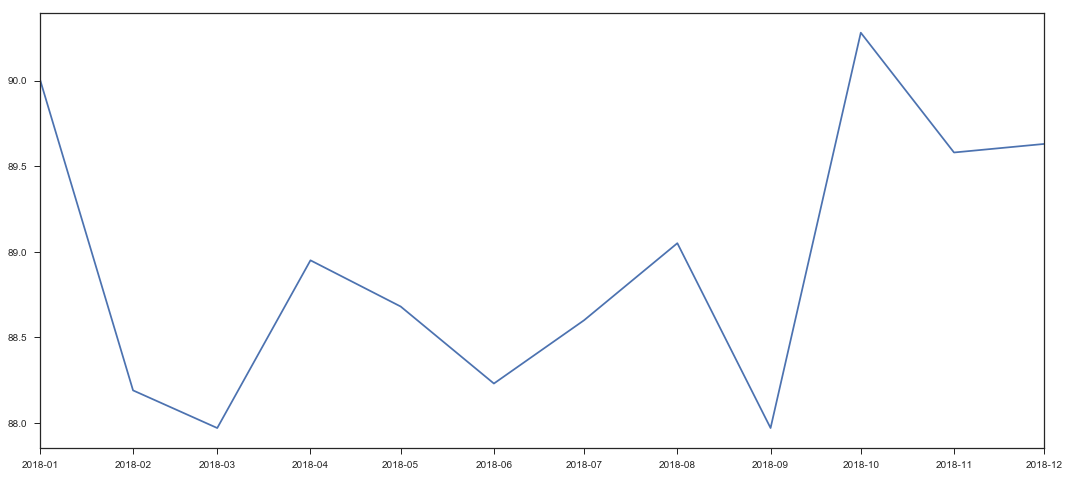

In [65]:
y1.plot.line()
plt.show()

In [49]:
train = y1.iloc[:11]
test = y1.iloc[11:]

In [66]:
train_data = np.asarray(train)
test_data = np.asarray(test)


NameError: name 'train' is not defined

In [67]:
y1_data = np.asarray(y1)

In [38]:
test.index

Index([2018-09-01, 2018-10-01, 2018-11-01, 2018-12-01, 2019-01-01, 2019-02-01], dtype='object')

In [32]:
model = SimpleExpSmoothing(train_data)
model._index = pd.to_datetime(train.index)

In [33]:
fit1 = model.fit()
pred1 = fit1.forecast(5)
fit1.summary()

In [34]:
fit2 = model.fit(smoothing_level=.2)
pred2 = fit2.forecast(5)
fit1.summary()

In [35]:
fit3 = model.fit(smoothing_level=.5)
pred3 = fit3.forecast(5)


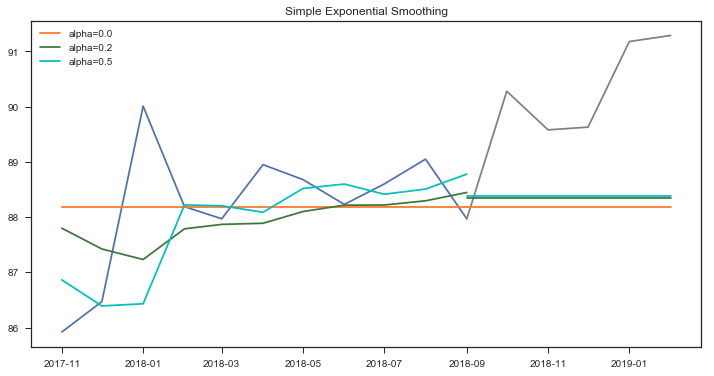

In [36]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(train.index, train.values)
ax.plot(test.index, test.values, color="gray")
for p, f, c in zip((pred1, pred2, pred3),(fit1, fit2, fit3),('#ff7823','#3c763d','c')):
    ax.plot(train.index, f.fittedvalues, color=c)
    ax.plot(test.index, p, label="alpha="+str(f.params['smoothing_level'])[:3], color=c)
plt.title("Simple Exponential Smoothing")    
plt.legend();

In [20]:
model = Holt(np.asarray(train_data))
model._index = pd.to_datetime(train.index)
train_index.

In [21]:
fit1 = model.fit(smoothing_level=.3, smoothing_slope=.05)
pred1 = fit1.forecast(4)
fit2 = model.fit(optimized=True)
pred2 = fit2.forecast(4)
fit3 = model.fit(smoothing_level=.3, smoothing_slope=.2)
pred3 = fit3.forecast(4)

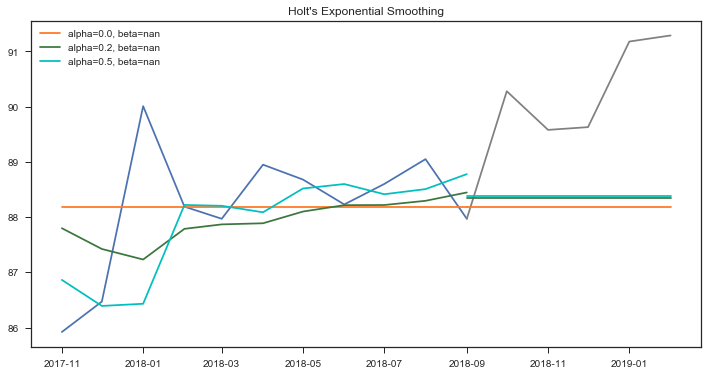

In [40]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(train.index, train.values)
ax.plot(test.index, test.values, color="gray")
for p, f, c in zip((pred1, pred2, pred3),(fit1, fit2, fit3),('#ff7823','#3c763d','c')):
    ax.plot(train.index, f.fittedvalues, color=c)
    ax.plot(test.index, p, label="alpha="+str(f.params['smoothing_level'])[:4]+", beta="+str(f.params['smoothing_slope'])[:4], color=c)
plt.title("Holt's Exponential Smoothing")
plt.legend();

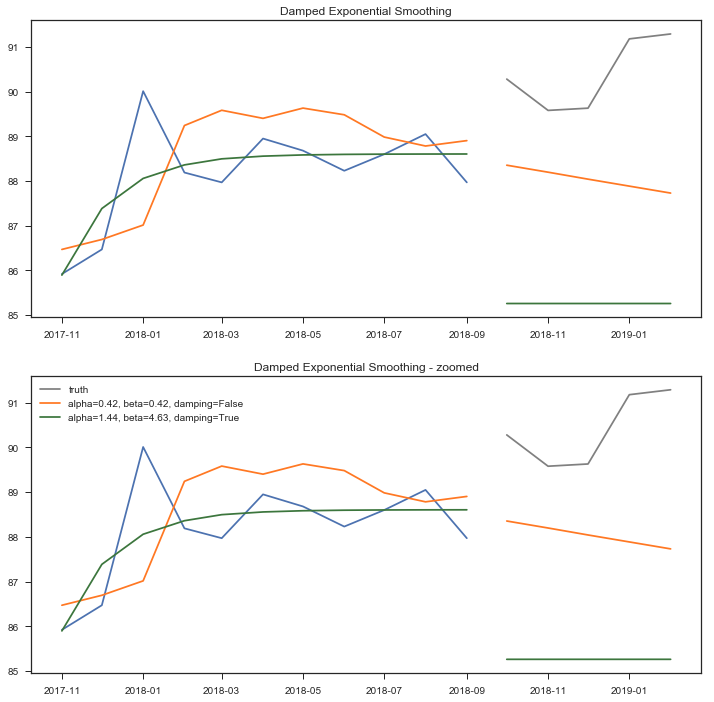

In [51]:
model = ExponentialSmoothing(train_data, trend='mul', seasonal=None)
model2 = ExponentialSmoothing(train_data, trend='mul', seasonal=None, damped=True)
model._index = pd.to_datetime(train.index)

fit1 = model.fit()
fit2 = model2.fit()
pred1 = fit1.forecast(4)
pred2 = fit2.forecast(5)
sse1 = np.sqrt(np.mean(np.square(test.values - pred1)))
sse2 = np.sqrt(np.mean(np.square(test.values - pred2)))

fig, ax = plt.subplots(2, figsize=(12, 12))
ax[0].plot(train.index, train.values)
ax[0].plot(test.index, test.values, color="gray", label="truth")
ax[1].plot(train.index, train.values)
ax[1].plot(test.index, test.values, color="gray", label="truth")
for p, f, c in zip((pred1, pred2),(fit1, fit2),('#ff7823','#3c763d')):
    ax[0].plot(train.index, f.fittedvalues, color=c)
    ax[1].plot(train.index, f.fittedvalues, color=c)
    ax[0].plot(test.index, p, label="alpha="+str(f.params['smoothing_level'])[:4]+", beta="+str(f.params['smoothing_slope'])[:4]+ ", damping="+str(True if f.params['damping_slope']>0 else False), color=c)
    ax[1].plot(test.index, p, label="alpha="+str(f.params['smoothing_level'])[:4]+", beta="+str(f.params['smoothing_slope'])[:4]+ ", damping="+str(True if f.params['damping_slope']>0 else False), color=c)
ax[0].set_title("Damped Exponential Smoothing");
ax[1].set_title("Damped Exponential Smoothing - zoomed");
plt.legend();

In [81]:
from matplotlib import pyplot

   Sl No.          Mandal  Nov-2017  Dec_2017  Jan_2018  Feb_2018  Mar_2018  \
0       1      Koilkuntla     86.43     87.76     90.70     90.14     91.09   
1       2  Maddikera East     85.92     86.47     90.01     88.19     87.97   
2       3       Allagadda     84.05     84.47     87.92     86.79     87.02   
3       4   Kolimingundla     87.11     87.96     89.90     89.60     88.31   
4       5          Kallur     84.50     84.82     87.07     87.81     87.09   

   Apr_2018  May_2018  June_2018  July_2018  Aug_2018  Sep_2018  Oct_2018  \
0     91.59     90.37      91.23      91.74     91.17     91.07     90.56   
1     88.95     88.68      88.23      88.60     89.05     87.97     90.28   
2     87.10     85.42      87.42      87.18     88.67     87.56     88.08   
3     89.36     88.08      89.00      89.34     89.35     88.87     89.24   
4     87.25     86.75      87.72      87.51     88.03     86.47     88.61   

   Nov_2018  Dec_2018  Jan_2019  Feb_2019  
0     91.39     91

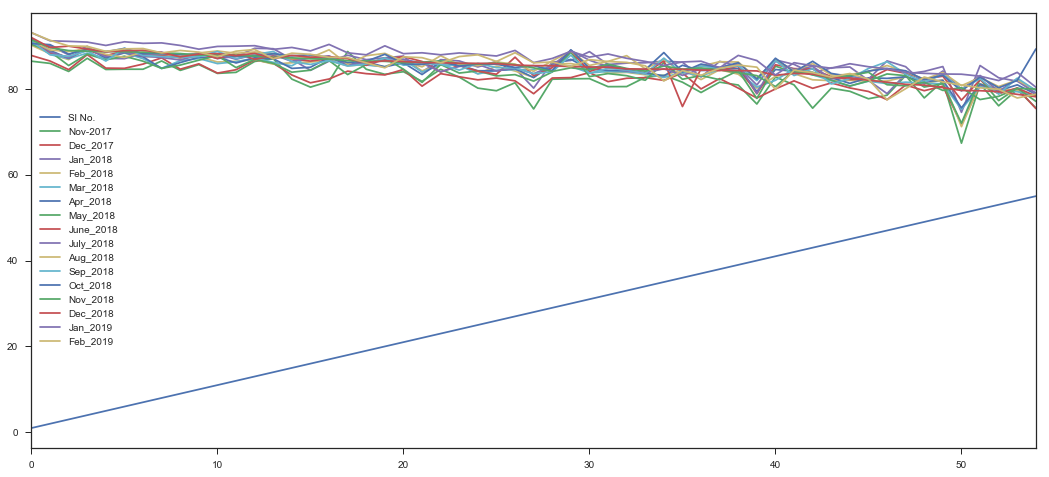

In [82]:
series = pd.read_csv(r'C:\Users\Bhargava\Downloads\Ration.csv')
print(series.head())
series.plot()
pyplot.show()

In [88]:
#series = series.drop(['Sl No.'],axis=1)
series.head()

,Mandal,Nov-2017,Dec_2017,Jan_2018,Feb_2018,Mar_2018,Apr_2018,May_2018,June_2018,July_2018,Aug_2018,Sep_2018,Oct_2018,Nov_2018,Dec_2018,Jan_2019,Feb_2019
0,Koilkuntla,86.43,87.76,90.70,90.14,91.09,91.59,90.37,91.23,91.74,91.17,91.07,90.56,91.39,91.93,93.07,93.06
1,Maddikera East,85.92,86.47,90.01,88.19,87.97,88.95,88.68,88.23,88.60,89.05,87.97,90.28,89.58,89.63,91.18,91.29
2,Allagadda,84.05,84.47,87.92,86.79,87.02,87.10,85.42,87.42,87.18,88.67,87.56,88.08,88.91,89.93,91.05,89.99
3,Kolimingundla,87.11,87.96,89.90,89.60,88.31,89.36,88.08,89.00,89.34,89.35,88.87,89.24,88.75,89.27,90.88,89.89
4,Kallur,84.50,84.82,87.07,87.81,87.09,87.25,86.75,87.72,87.51,88.03,86.47,88.61,88.69,88.62,90.10,88.72


C:\Users\Bhargava\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  


TypeError: must be str, not float

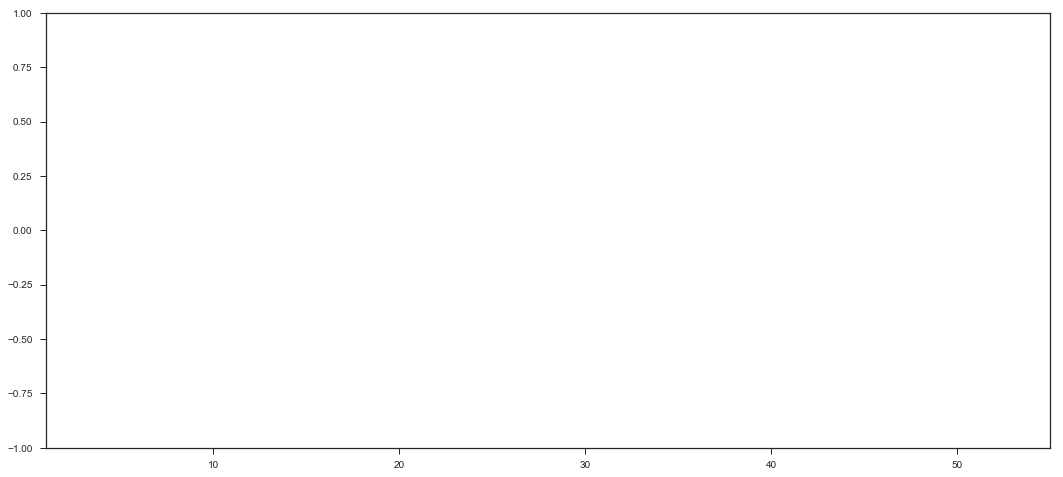

In [86]:
from pandas.tools.plotting import autocorrelation_plot
autocorrelation_plot(series)
pyplot.show()